# AGE AND GENDER DETECTION

**Loading the dataset from google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/ML Proj/ML_Dataset/ML_Dataset.zip"

**Importing the necessary libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

**GENDER PREDICTION**

In [ ]:
train_gen_data = r"/content/ML_Dataset/GenderTrain"

In [ ]:
test_gen_data = r"/content/ML_Dataset/GenderTest"

In [ ]:
img_width , img_height = 32,32
import tensorflow.keras.backend as kb
if kb.image_data_format() == "channels_first":
  input_shape = (3,img_width , img_height)
else:
  input_shape = (img_width , img_height, 3)

In [ ]:
train_gendata = ImageDataGenerator(rescale = 1. /255, shear_range=0.2, zoom_range= 0.2 , width_shift_range=0.2, height_shift_range= 0.2, horizontal_flip= True)
train_gen_set = train_gendata.flow_from_directory(train_gen_data, target_size = (img_width, img_height),batch_size = 64,  class_mode = 'binary', classes = ['Male','Female'])

Found 4719 images belonging to 2 classes.


In [ ]:
test_gendata = ImageDataGenerator(rescale = 1. /255)
test_gen_set = test_gendata.flow_from_directory(test_gen_data, target_size = (img_width, img_height),batch_size = 64, class_mode = 'binary', classes = ['Male','Female'])

Found 1032 images belonging to 2 classes.


In [ ]:
tf.keras.backend.clear_session()

**Creating a CNN model for gender prediction**

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          1

In [ ]:
history = model.fit(train_gen_set, steps_per_epoch = 74, epochs = 25, validation_data = test_gen_set, validation_steps = 16)

Epoch 1/25
74/74 [==============================] - 12s 168ms/step - loss: 0.5650 - accuracy: 0.7059 - val_loss: 0.5124 - val_accuracy: 0.7471
Epoch 2/25
74/74 [==============================] - 12s 166ms/step - loss: 0.5746 - accuracy: 0.6985 - val_loss: 0.5032 - val_accuracy: 0.7480
Epoch 3/25
74/74 [==============================] - 12s 166ms/step - loss: 0.5538 - accuracy: 0.7148 - val_loss: 0.4929 - val_accuracy: 0.7549
Epoch 4/25
74/74 [==============================] - 12s 165ms/step - loss: 0.5471 - accuracy: 0.7271 - val_loss: 0.4829 - val_accuracy: 0.7598
Epoch 5/25
74/74 [==============================] - 12s 164ms/step - loss: 0.5402 - accuracy: 0.7192 - val_loss: 0.4742 - val_accuracy: 0.7754
Epoch 6/25
74/74 [==============================] - 12s 164ms/step - loss: 0.5481 - accuracy: 0.7203 - val_loss: 0.4798 - val_accuracy: 0.7744
Epoch 7/25
74/74 [==============================] - 12s 164ms/step - loss: 0.5285 - accuracy: 0.7319 - val_loss: 0.5052 - val_accuracy: 0.7480

**Plotting graph for training accuracy and testing accuracy**

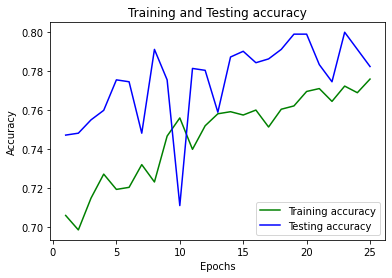

In [ ]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
epochs = range(1,26)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, test_acc , 'b', label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**AGE PREDICTION**

In [ ]:
train_age_data = r"/content/ML_Dataset/AgeTrain"

In [ ]:
test_age_data = r"/content/ML_Dataset/AgeTest"

In [ ]:
img_width , img_height = 32, 32
import tensorflow.keras.backend as kb
if kb.image_data_format() == "channels_first":
  input_shape = (3,img_width , img_height)
else:
  input_shape = (img_width , img_height, 3)

In [ ]:
train_agedata = ImageDataGenerator(rescale = 1. /255, shear_range=0.2, zoom_range= 0.2 , horizontal_flip= True, brightness_range=[0.4, 1.2])
train_age_set = train_agedata.flow_from_directory(train_age_data, target_size = (32, 32),batch_size = 64, classes = ['0-6','8-12','15-20','25-32','38-43','48-53','60-100'])

Found 5076 images belonging to 7 classes.


In [ ]:
test_agedata = ImageDataGenerator(rescale = 1. /255)
test_age_set = test_agedata.flow_from_directory(test_age_data, target_size = (32, 32),batch_size = 64, classes = ['0-6','8-12','15-20','25-32','38-43','48-53','60-100'])

Found 1050 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.regularizers import l1

In [ ]:
tf.keras.backend.clear_session()

**Creating CNN model for age prediction** 

In [ ]:
model1 = Sequential()
model1.add(Conv2D(16, (3,3), input_shape = input_shape, kernel_regularizer = l1(0.001)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D((2,2), strides = 2))

"""model1.add(Conv2D(32, (3,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D((2,2), strides = 2))"""

model1.add(Conv2D(64, (3,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D((2,2), strides = 2))

model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dense(7))
model1.add(Activation('softmax'))

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [ ]:
model1.compile(optimizer =opt , loss = ['categorical_crossentropy'], metrics = ['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
activation_9 (Activation)    (None, 30, 30, 16)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)        9280      
_________________________________________________________________
activation_10 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)             

In [ ]:
history = model1.fit(train_age_set, steps_per_epoch = 80, epochs = 20, validation_data = test_age_set, validation_steps = 16)

Epoch 1/20
80/80 [==============================] - 14s 173ms/step - loss: 1.9901 - accuracy: 0.1904 - val_loss: 1.9432 - val_accuracy: 0.1572
Epoch 2/20
80/80 [==============================] - 13s 168ms/step - loss: 1.8919 - accuracy: 0.2386 - val_loss: 1.8229 - val_accuracy: 0.2607
Epoch 3/20
80/80 [==============================] - 14s 169ms/step - loss: 1.7576 - accuracy: 0.3097 - val_loss: 1.7401 - val_accuracy: 0.2822
Epoch 4/20
80/80 [==============================] - 14s 170ms/step - loss: 1.6683 - accuracy: 0.3379 - val_loss: 1.6199 - val_accuracy: 0.3604
Epoch 5/20
80/80 [==============================] - 14s 169ms/step - loss: 1.5792 - accuracy: 0.3773 - val_loss: 1.6181 - val_accuracy: 0.3379
Epoch 6/20
80/80 [==============================] - 14s 171ms/step - loss: 1.5352 - accuracy: 0.4030 - val_loss: 1.5650 - val_accuracy: 0.3848
Epoch 7/20
80/80 [==============================] - 14s 170ms/step - loss: 1.5207 - accuracy: 0.4188 - val_loss: 1.5359 - val_accuracy: 0.3750

**Plotting graph for training accuracy and testing accuracy**

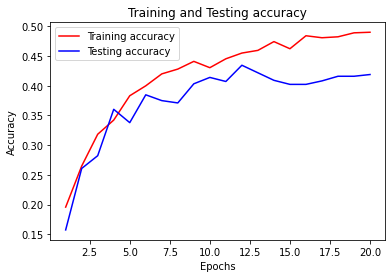

In [ ]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, train_acc, 'r', label='Training accuracy')
plt.plot(epochs, test_acc , 'b', label='Testing accuracy')
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**PREDICTION OF GENDER AND AGE**

In [ ]:
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/ML Proj/ML_Dataset/test3.jfif',target_size = (32, 32))

In [ ]:
test_image = image.img_to_array(test_image)

In [ ]:
test_image = np.expand_dims(test_image, axis = 0)

In [ ]:
train_age_set.class_indices

{'0-6': 0,
 '15-20': 2,
 '25-32': 3,
 '38-43': 4,
 '48-53': 5,
 '60-100': 6,
 '8-12': 1}

In [ ]:
test_age_set.class_indices

{'0-6': 0,
 '15-20': 2,
 '25-32': 3,
 '38-43': 4,
 '48-53': 5,
 '60-100': 6,
 '8-12': 1}

In [ ]:
age = {0:"0-6", 1:"8-12", 2:"15-20", 3:"25-32", 4:"38-43", 5:"48-53", 6:"60-100"}

In [ ]:
gender = {0:"Male", 1:"Female"}

In [ ]:
age_result = model1.predict(test_image)
max_prob = np.argmax(age_result, axis=None)
predicted_age = age[max_prob]

In [ ]:
gender_result = model.predict(test_image)
predicted_gender = gender[gender_result[0][0].round()]

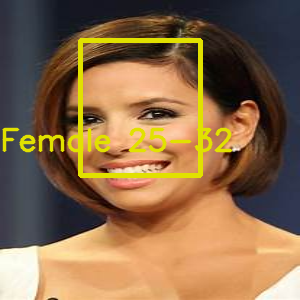

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
path = r'/content/drive/MyDrive/ML Proj/ML_Dataset/test3.jfif'
image = cv2.imread(path)
text = predicted_gender
text = text + " " + predicted_age
font = cv2.FONT_HERSHEY_SIMPLEX
org = (00, 150)
color = (0,225,225)
thickness = 2
fontScale = 1
image = cv2.resize(image,(300,300))
image = cv2.rectangle(image, (80,40),(200,175),(0,225,225),3)
image = cv2.putText(image, text, org, font, fontScale, color, thickness, cv2.LINE_AA, False)
cv2_imshow(image)

In [ ]:
!pip install anvil-uplink

In [ ]:
import anvil.server

anvil.server.connect("7ZFPC5KKBJRHHJFY2NSTQITX-UDLEFM2XBN6EJMA3")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment (dev)" as SERVER


In [ ]:
import anvil.media

@anvil.server.callable

def classify(file):
  with anvil.media.TempFile(file) as filename:
    img = image.load_img(filename)
  img = img.resize((32,32))
  arr = image.img_to_array(img)
  arr = np.expand_dims(arr, axis = 0)
  arr /= 255.0

  a_res = model1.predict(arr)
  g_res = model.predict(arr)
  gender = {0:"Male", 1:"Female"}
  age = {0:"0-6", 1:"8-12", 2:"15-20", 3:"25-32", 4:"38-43", 5:"48-53", 6:"60-100"}
  res = gender[g_res[0][0].round()] 
  res = res + " " + age[np.argmax(a_res)]
  return res
